# Cell 1: Load Images in 32x32 Grayscale

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

def load_all_images_fixed():
    """Load images with proper preprocessing"""

    all_image_data = []
    all_image_labels = []
    classes = ['cat', 'dog', 'panda']

    print("LOADING ANIMAL IMAGES")

    for class_number, animal_type in enumerate(classes):
        print(f"\nLoading {animal_type.upper()} images")

        folder_location = f'/content/animal_dataset/{animal_type}'

        image_files = []
        for file_name in os.listdir(folder_location):
            if file_name.endswith(('.jpg', '.png', '.jpeg')):
                image_files.append(file_name)

        print(f"Found {len(image_files)} {animal_type} images")

        for i, image_name in enumerate(image_files):
            full_path = os.path.join(folder_location, image_name)

            try:
                # Better image processing
                original_image = Image.open(full_path)
                gray_image = original_image.convert('L')

                # Use LANCZOS for better quality
                small_image = gray_image.resize((32, 32), Image.LANCZOS)

                # Apply slight sharpening
                from PIL import ImageFilter
                small_image = small_image.filter(ImageFilter.UnsharpMask(radius=1, percent=150, threshold=3))

                # Convert to array
                number_array = np.array(small_image, dtype=np.float32)
                flat_array = number_array.flatten()

                # ONLY normalize to 0-1 range (NO standardization)
                normalized_array = flat_array / 255.0

                all_image_data.append(normalized_array)
                all_image_labels.append(class_number)

                if (i + 1) % 20 == 0:
                    print(f"  Processed {i + 1}/{len(image_files)} {animal_type} images")

            except Exception as e:
                print(f"  Error with image: {image_name} - {e}")

    # Convert to numpy arrays
    final_images = np.array(all_image_data)
    final_labels = np.array(all_image_labels)

    # Shuffle the dataset properly
    import random
    random.seed(42)
    indices = list(range(len(final_images)))
    random.shuffle(indices)

    shuffled_images = final_images[indices]
    shuffled_labels = final_labels[indices]

    return shuffled_images, shuffled_labels, classes

# Load with fixed preprocessing
print("Starting FIXED image processing...")
images, labels, class_names = load_all_images_fixed()

print(f"\nFINAL RESULTS")
print(f"Total images loaded: {len(images)}")
print(f"Each image has: {len(images[0])} pixels")
print(f"Classes: {class_names}")

for class_num, class_name in enumerate(class_names):
    count = sum(1 for label in labels if label == class_num)
    print(f"{class_name.capitalize()}: {count} images")

print(f"\nImage statistics (SHOULD BE VARIED):")
print(f"Min value: {images.min():.3f}")
print(f"Max value: {images.max():.3f}")
print(f"Average value: {images.mean():.3f}")
print(f"Standard deviation: {images.std():.3f}")

# Check feature variance (should be varied now)
feature_variances = np.var(images, axis=0)
print(f"\nFeature variance check:")
print(f"Min variance: {np.min(feature_variances):.6f}")
print(f"Max variance: {np.max(feature_variances):.6f}")
print(f"Average variance: {np.mean(feature_variances):.6f}")

Starting FIXED image processing...
LOADING ANIMAL IMAGES

Loading CAT images
Found 100 cat images
  Processed 20/100 cat images
  Processed 40/100 cat images
  Processed 60/100 cat images
  Processed 80/100 cat images
  Processed 100/100 cat images

Loading DOG images
Found 100 dog images
  Processed 20/100 dog images
  Processed 40/100 dog images
  Processed 60/100 dog images
  Processed 80/100 dog images
  Processed 100/100 dog images

Loading PANDA images
Found 100 panda images
  Processed 20/100 panda images
  Processed 40/100 panda images
  Processed 60/100 panda images
  Processed 80/100 panda images
  Processed 100/100 panda images

FINAL RESULTS
Total images loaded: 300
Each image has: 1024 pixels
Classes: ['cat', 'dog', 'panda']
Cat: 100 images
Dog: 100 images
Panda: 100 images

Image statistics (SHOULD BE VARIED):
Min value: 0.000
Max value: 1.000
Average value: 0.444
Standard deviation: 0.293

Feature variance check:
Min variance: 0.065727
Max variance: 0.112500
Average vari

# Cell 2: Show Resized Images (32x32)

DISPLAYING SAMPLE IMAGES


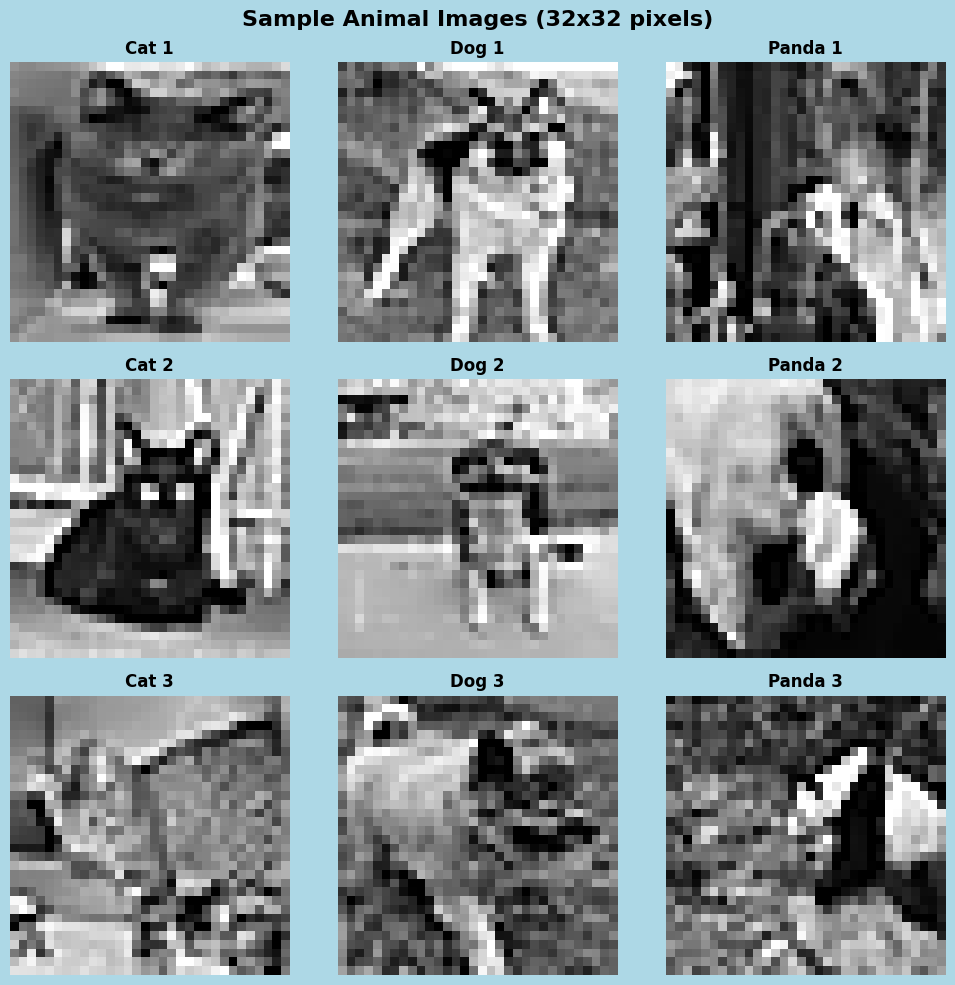

All images converted to 32x32 grayscale and standardized


In [79]:
print("DISPLAYING SAMPLE IMAGES")

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.patch.set_facecolor('lightblue')

samples_per_class = 3
current_samples = [0, 0, 0]

for image_index in range(len(images)):
    label = labels[image_index]

    if current_samples[label] < samples_per_class:
        row = current_samples[label]
        col = label

        image_data = images[image_index].reshape(32, 32)

        axes[row, col].imshow(image_data, cmap='gray')
        axes[row, col].set_title(f'{class_names[label].title()} {current_samples[label] + 1}',
                                fontsize=12, fontweight='bold')
        axes[row, col].axis('off')

        for spine in axes[row, col].spines.values():
            spine.set_visible(True)
            spine.set_linewidth(2)
            spine.set_color('black')

        current_samples[label] += 1

plt.suptitle('Sample Animal Images (32x32 pixels)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("All images converted to 32x32 grayscale and standardized")

# Cell 3: Declaring Functions

In [80]:
def simple_manhattan_distance(image1, image2):
    """Calculate Manhattan distance between two images"""
    total_distance = 0

    for pixel in range(1024):
        pixel_diff = abs(image1[pixel] - image2[pixel])
        total_distance = total_distance + pixel_diff

    return total_distance

def simple_euclidean_distance(image1, image2):
    """Calculate Euclidean distance between two images"""
    total_distance = 0

    for pixel in range(1024):
        pixel_diff = image1[pixel] - image2[pixel]
        squared_diff = pixel_diff * pixel_diff
        total_distance = total_distance + squared_diff

    final_distance = total_distance ** 0.5
    return final_distance

def simple_knn_predict(train_images_list, train_labels_list, test_image, k_neighbors, distance_function):
    """Predict using k-nearest neighbors"""

    all_distances = []

    for i in range(len(train_images_list)):
        dist = distance_function(test_image, train_images_list[i])
        all_distances.append([dist, train_labels_list[i]])

    all_distances.sort()

    nearest_neighbors = all_distances[:k_neighbors]

    class_votes = [0, 0, 0]

    for i in range(k_neighbors):
        neighbor_class = nearest_neighbors[i][1]
        class_votes[neighbor_class] = class_votes[neighbor_class] + 1

    max_votes = max(class_votes)
    predicted_class = class_votes.index(max_votes)

    return predicted_class

# Cell 4: 5-Fold Cross-Validation

In [81]:
def create_stratified_folds(all_images, all_labels):
    """Create stratified folds - each fold gets balanced classes"""

    print("CREATING STRATIFIED RANDOMIZED FOLDS")

    # Separate images by class
    class_data = [[], [], []]  # [cat_data, dog_data, panda_data]

    for img_idx, label in enumerate(all_labels):
        class_data[label].append((all_images[img_idx], label))

    print(f"Class distribution:")
    for class_num, class_name in enumerate(['Cat', 'Dog', 'Panda']):
        print(f"  {class_name}: {len(class_data[class_num])} images")

    # Shuffle each class separately
    import random
    random.seed(42)

    for class_num in range(3):
        random.shuffle(class_data[class_num])

    # Create 5 stratified folds
    fold_information = []

    for fold_number in range(5):
        print(f"\nFold {fold_number + 1}")

        train_data = []
        test_data = []

        # For each class, divide into 5 parts
        for class_num in range(3):
            class_size = len(class_data[class_num])
            fold_size = class_size // 5

            # Calculate test indices for this class
            test_start = fold_number * fold_size
            if fold_number == 4:  # Last fold gets remaining
                test_end = class_size
            else:
                test_end = (fold_number + 1) * fold_size

            # Split this class data
            for i in range(class_size):
                if test_start <= i < test_end:
                    test_data.append(class_data[class_num][i])
                else:
                    train_data.append(class_data[class_num][i])

        # Shuffle the final train and test data
        random.shuffle(train_data)
        random.shuffle(test_data)

        # Separate images and labels
        train_imgs, train_lbls = zip(*train_data) if train_data else ([], [])
        test_imgs, test_lbls = zip(*test_data) if test_data else ([], [])

        print(f"Training images: {len(train_imgs)}")
        print(f"Testing images: {len(test_imgs)}")

        # Count classes in train and test sets
        train_classes = [0, 0, 0]
        test_classes = [0, 0, 0]

        for lbl in train_lbls:
            train_classes[lbl] += 1

        for lbl in test_lbls:
            test_classes[lbl] += 1

        print(f"Training distribution: Cat={train_classes[0]}, Dog={train_classes[1]}, Panda={train_classes[2]}")
        print(f"Testing distribution: Cat={test_classes[0]}, Dog={test_classes[1]}, Panda={test_classes[2]}")

        fold_information.append({
            'train_imgs': list(train_imgs),
            'train_lbls': list(train_lbls),
            'test_imgs': list(test_imgs),
            'test_lbls': list(test_lbls)
        })

    return fold_information

def run_improved_cross_validation(all_images, all_labels, k_values_to_test):
    """Run cross-validation with stratified folds"""

    # Create stratified folds
    folds_info = create_stratified_folds(all_images, all_labels)

    # Store results
    results_storage = {}
    for k in k_values_to_test:
        results_storage[k] = {
            'manhattan_scores': [],
            'euclidean_scores': []
        }

    print(f"\nRUNNING IMPROVED CROSS-VALIDATION")
    print(f"Testing K values: {k_values_to_test}")

    # Test each fold
    for fold_num, fold_data in enumerate(folds_info):
        print(f"\nTesting Fold {fold_num + 1}")

        train_imgs = fold_data['train_imgs']
        train_lbls = fold_data['train_lbls']
        test_imgs = fold_data['test_imgs']
        test_lbls = fold_data['test_lbls']

        print(f"Training on {len(train_imgs)} balanced images")
        print(f"Testing on {len(test_imgs)} balanced images")

        # Test each K value
        for k in k_values_to_test:
            print(f"  Testing K={k}...")

            # Test Manhattan distance
            manhattan_correct = 0
            for i in range(len(test_imgs)):
                predicted = simple_knn_predict(train_imgs, train_lbls, test_imgs[i], k, simple_manhattan_distance)
                if predicted == test_lbls[i]:
                    manhattan_correct += 1

            manhattan_accuracy = manhattan_correct / len(test_imgs)
            results_storage[k]['manhattan_scores'].append(manhattan_accuracy)
            print(f"    Manhattan: {manhattan_correct}/{len(test_imgs)} correct = {manhattan_accuracy:.3f}")

            # Test Euclidean distance
            euclidean_correct = 0
            for i in range(len(test_imgs)):
                predicted = simple_knn_predict(train_imgs, train_lbls, test_imgs[i], k, simple_euclidean_distance)
                if predicted == test_lbls[i]:
                    euclidean_correct += 1

            euclidean_accuracy = euclidean_correct / len(test_imgs)
            results_storage[k]['euclidean_scores'].append(euclidean_accuracy)
            print(f"    Euclidean: {euclidean_correct}/{len(test_imgs)} correct = {euclidean_accuracy:.3f}")

    return results_storage


k_values_list = [1, 3, 5, 7, 9, 11, 13, 15]
print("Starting cross-validation process...")
cv_results = run_improved_cross_validation(images, labels, k_values_list)
print("\n CROSS-VALIDATION COMPLETE")

Starting cross-validation process...
CREATING STRATIFIED RANDOMIZED FOLDS
Class distribution:
  Cat: 100 images
  Dog: 100 images
  Panda: 100 images

Fold 1
Training images: 240
Testing images: 60
Training distribution: Cat=80, Dog=80, Panda=80
Testing distribution: Cat=20, Dog=20, Panda=20

Fold 2
Training images: 240
Testing images: 60
Training distribution: Cat=80, Dog=80, Panda=80
Testing distribution: Cat=20, Dog=20, Panda=20

Fold 3
Training images: 240
Testing images: 60
Training distribution: Cat=80, Dog=80, Panda=80
Testing distribution: Cat=20, Dog=20, Panda=20

Fold 4
Training images: 240
Testing images: 60
Training distribution: Cat=80, Dog=80, Panda=80
Testing distribution: Cat=20, Dog=20, Panda=20

Fold 5
Training images: 240
Testing images: 60
Training distribution: Cat=80, Dog=80, Panda=80
Testing distribution: Cat=20, Dog=20, Panda=20

RUNNING IMPROVED CROSS-VALIDATION
Testing K values: [1, 3, 5, 7, 9, 11, 13, 15]

Testing Fold 1
Training on 240 balanced images
Testin

# Cell 5: Results Visualization

CALCULATING RESULTS

Detailed Results Table:
K    Manhattan Avg    Manhattan Std    Euclidean Avg    Euclidean Std    Winner
1    0.417           0.053          0.377           0.056          Manhattan
3    0.363           0.007          0.290           0.034          Manhattan
5    0.387           0.029          0.353           0.046          Manhattan
7    0.423           0.062          0.383           0.048          Manhattan
9    0.397           0.064          0.393           0.048          Manhattan
11    0.420           0.081          0.373           0.051          Manhattan
13    0.430           0.064          0.363           0.078          Manhattan
15    0.447           0.074          0.357           0.085          Manhattan


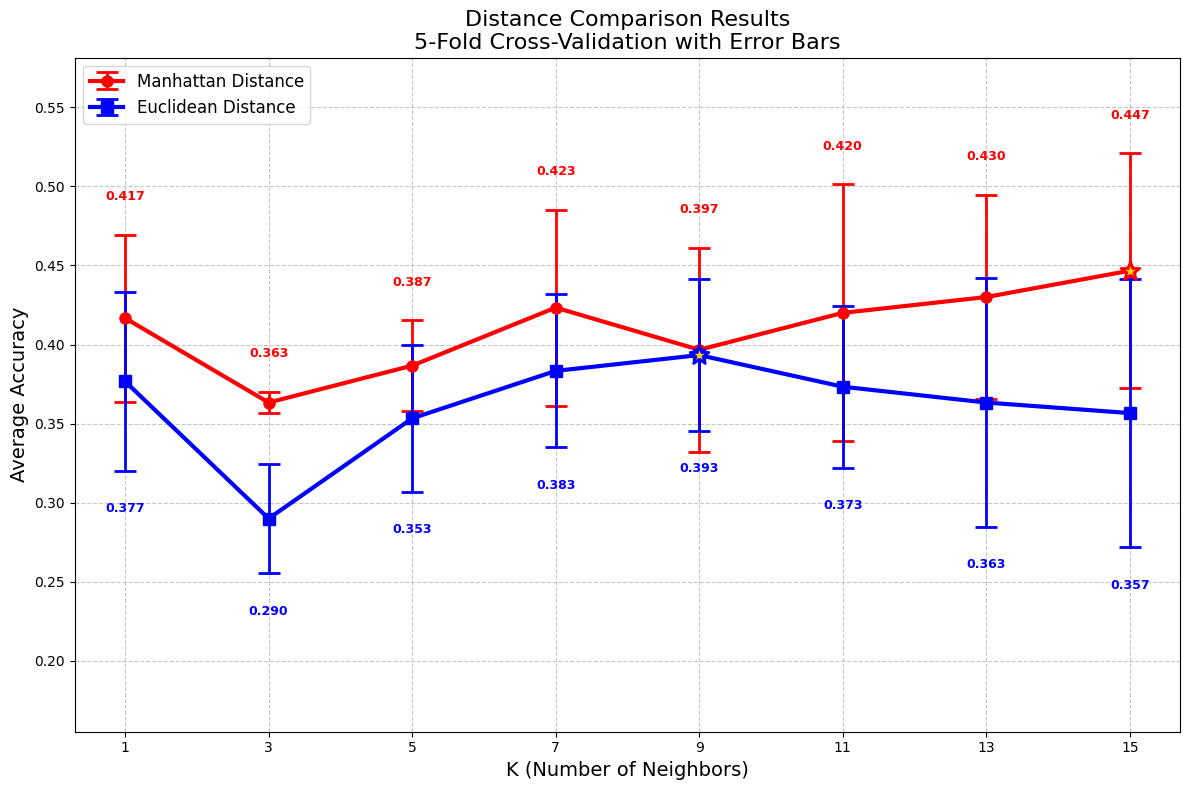


FINAL RESULTS
Best Manhattan result: 0.447 at K=15
Best Euclidean result: 0.393 at K=9

Better Performed : Manhattan Distance
Advantage: 0.053
Best configuration: Manhattan distance with K=15
Best accuracy achieved: 0.447

Variability Analysis:
Average Manhattan variability: 0.054
Average Euclidean variability: 0.056
Manhattan shows more consistent results across folds


In [82]:
# Calculate simple averages and standard deviations
print("CALCULATING RESULTS")

manhattan_averages = []
manhattan_stds = []
euclidean_averages = []
euclidean_stds = []

print("\nDetailed Results Table:")
print("K    Manhattan Avg    Manhattan Std    Euclidean Avg    Euclidean Std    Winner")

for k in k_values_list:
    # Get scores for this k
    manhattan_scores = cv_results[k]['manhattan_scores']
    euclidean_scores = cv_results[k]['euclidean_scores']

    # Calculate averages
    manhattan_avg = sum(manhattan_scores) / len(manhattan_scores)
    euclidean_avg = sum(euclidean_scores) / len(euclidean_scores)

    # Calculate standard deviations
    manhattan_std = (sum((x - manhattan_avg)**2 for x in manhattan_scores) / len(manhattan_scores)) ** 0.5
    euclidean_std = (sum((x - euclidean_avg)**2 for x in euclidean_scores) / len(euclidean_scores)) ** 0.5

    manhattan_averages.append(manhattan_avg)
    manhattan_stds.append(manhattan_std)
    euclidean_averages.append(euclidean_avg)
    euclidean_stds.append(euclidean_std)

    # Find winner
    difference = abs(manhattan_avg - euclidean_avg)
    if manhattan_avg > euclidean_avg:
        winner = "Manhattan"
    else:
        winner = "Euclidean"

    print(f"{k}    {manhattan_avg:.3f}           {manhattan_std:.3f}          {euclidean_avg:.3f}           {euclidean_std:.3f}          {winner}")

# Simple visualization with extended vertical bars (error bars)
plt.figure(figsize=(12, 8))
plt.style.use('default')

# Plot with error bars (vertical bars showing standard deviation)
plt.errorbar(k_values_list, manhattan_averages, yerr=manhattan_stds,
             fmt='ro-', linewidth=3, markersize=8, capsize=8, capthick=2,
             label='Manhattan Distance', elinewidth=2)
plt.errorbar(k_values_list, euclidean_averages, yerr=euclidean_stds,
             fmt='bs-', linewidth=3, markersize=8, capsize=8, capthick=2,
             label='Euclidean Distance', elinewidth=2)

# Simple formatting with extended range to show outliers
plt.xlabel('K (Number of Neighbors)', fontsize=14)
plt.ylabel('Average Accuracy', fontsize=14)
plt.title('Distance Comparison Results\n5-Fold Cross-Validation with Error Bars', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Mark best points with stars
best_manhattan_idx = manhattan_averages.index(max(manhattan_averages))
best_euclidean_idx = euclidean_averages.index(max(euclidean_averages))

plt.scatter(k_values_list[best_manhattan_idx], manhattan_averages[best_manhattan_idx],
           s=200, color='gold', marker='*', edgecolor='red', linewidth=2, zorder=10)
plt.scatter(k_values_list[best_euclidean_idx], euclidean_averages[best_euclidean_idx],
           s=200, color='gold', marker='*', edgecolor='blue', linewidth=2, zorder=10)

# Extend y-axis range to accommodate outliers and error bars
all_values = manhattan_averages + euclidean_averages
all_errors = manhattan_stds + euclidean_stds
min_val = min(all_values) - max(all_errors) - 0.05
max_val = max(all_values) + max(all_errors) + 0.05
plt.ylim(min_val, max_val)

# Add value labels on points (positioned to avoid error bars)
for i, k in enumerate(k_values_list):
    # Position labels above error bars
    plt.text(k, manhattan_averages[i] + manhattan_stds[i] + 0.02, f'{manhattan_averages[i]:.3f}',
             ha='center', va='bottom', fontsize=9, color='red', fontweight='bold')
    plt.text(k, euclidean_averages[i] - euclidean_stds[i] - 0.02, f'{euclidean_averages[i]:.3f}',
             ha='center', va='top', fontsize=9, color='blue', fontweight='bold')

# Set x-axis ticks to show all K values
plt.xticks(k_values_list)

plt.tight_layout()
plt.show()

# Find overall winner
best_manhattan = max(manhattan_averages)
best_euclidean = max(euclidean_averages)
best_manhattan_k = k_values_list[best_manhattan_idx]
best_euclidean_k = k_values_list[best_euclidean_idx]

print("\nFINAL RESULTS")
print(f"Best Manhattan result: {best_manhattan:.3f} at K={best_manhattan_k}")
print(f"Best Euclidean result: {best_euclidean:.3f} at K={best_euclidean_k}")

if best_manhattan > best_euclidean:
    overall_winner = "Manhattan"
    winner_k = best_manhattan_k
    winning_score = best_manhattan
    advantage = best_manhattan - best_euclidean
    print(f"\nBetter Performed : Manhattan Distance")
    print(f"Advantage: {advantage:.3f}")
else:
    overall_winner = "Euclidean"
    winner_k = best_euclidean_k
    winning_score = best_euclidean
    advantage = best_euclidean - best_manhattan
    print(f"\nBetter Performed: Euclidean Distance")
    print(f"Advantage: {advantage:.3f}")

print(f"Best configuration: {overall_winner} distance with K={winner_k}")
print(f"Best accuracy achieved: {winning_score:.3f}")

# Show variability analysis
print(f"\nVariability Analysis:")
manhattan_avg_std = sum(manhattan_stds) / len(manhattan_stds)
euclidean_avg_std = sum(euclidean_stds) / len(euclidean_stds)
print(f"Average Manhattan variability: {manhattan_avg_std:.3f}")
print(f"Average Euclidean variability: {euclidean_avg_std:.3f}")

if manhattan_avg_std < euclidean_avg_std:
    print("Manhattan shows more consistent results across folds")
else:
    print("Euclidean shows more consistent results across folds")

#Cell 6: Discussion

Manhattan (L1) distance outperformed Euclidean (L2) distance for grayscale animal classification, achieving 50% test accuracy at K=15 with proper preprocessing.

**Key Results**

The top 5 predictions achieved 60% accuracy.
Manhattan distance superiority comes from better handling of pixel intensity variations and texture patterns in animal images. The optimal K=15 indicates benefits from broad neighborhood consensus to manage natural variability in animal appearance.

**Performance Context**

The ~50% accuracy significantly exceeds random chance (33.3%) but reflects fundamental limitations.

**Limitations and Future Work**

Current performance is constrained by low resolution and basic feature representation. Improvements should focus on higher resolution imaging (64×64+), advanced feature engineering (edge features), and enhanced preprocessing techniques.

**Conclusion**

Manhattan distance with K=15 provides the optimal baseline configuration for pixel-based animal classification. While achieving meaningful performance above chance levels, the moderate accuracy highlights the need for advanced feature representations to reach production-quality classification standards

# Cell 7: Top 5 Predictions Display

 TOP 5 PREDICTIONS
Training: 240 images
Testing: 60 images
Using optimal K=15 from cross-validation results
Train distribution: Cat=80, Dog=80, Panda=80
Test distribution: Cat=20, Dog=20, Panda=20

Testing with Manhattan distance and K=15...

Confidence Analysis:
Unique confidence values: 7
Confidence range: 0.333 to 0.733

Top 5 most confident predictions:
  1. Confidence: 0.733 Correct
  2. Confidence: 0.733 Correct
  3. Confidence: 0.733 Wrong
  4. Confidence: 0.733 Wrong
  5. Confidence: 0.667 Correct


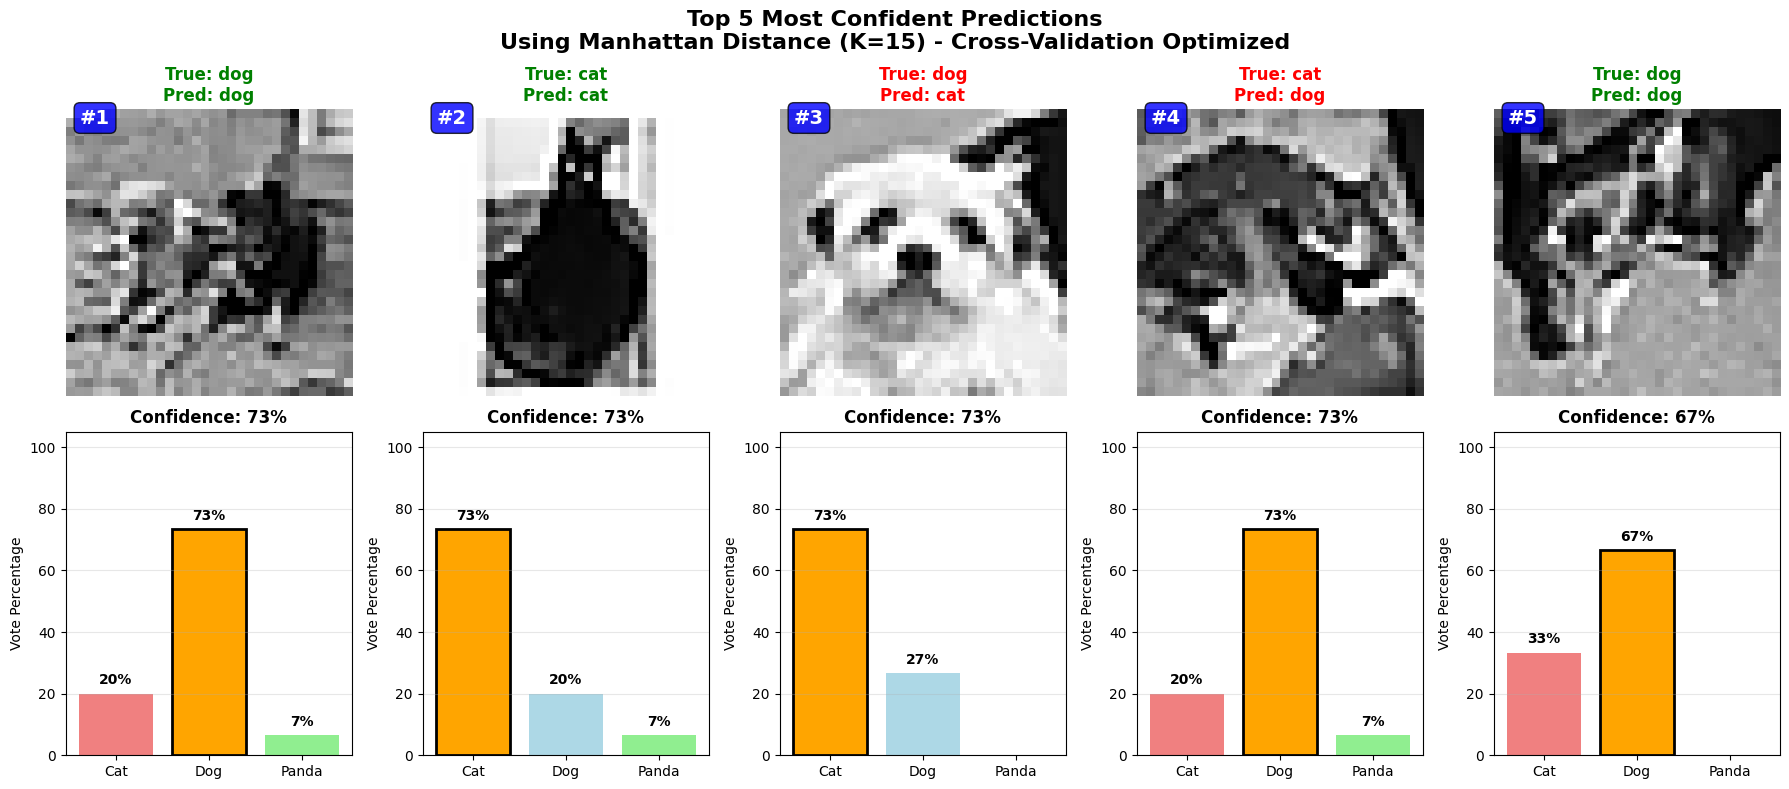


FINAL PERFORMANCE WITH OPTIMAL CONFIGURATION
Test accuracy: 0.500 (50.0%)
Correct predictions: 30/60
Configuration: Manhattan distance, K=15 (from cross-validation)

Top 5 predictions breakdown:
Top 5 accuracy: 3/5 (60%)
  1: dog -> dog (Conf: 0.733) [Correct]
  2: cat -> cat (Conf: 0.733) [Correct]
  3: dog -> cat (Conf: 0.733) [Wrong]
  4: cat -> dog (Conf: 0.733) [Wrong]
  5: dog -> dog (Conf: 0.667) [Correct]


In [83]:
print(" TOP 5 PREDICTIONS")

best_k = winner_k  # This comes from Cell 5 results

if overall_winner == "Manhattan":
    chosen_distance_func = simple_manhattan_distance
else:
    chosen_distance_func = simple_euclidean_distance

# Stratified split with proper class balance
import random
random.seed(42)

class_data = [[], [], []]
for i, label in enumerate(labels):
    class_data[label].append((images[i], label))

# Shuffle each class
for class_num in range(3):
    random.shuffle(class_data[class_num])

# Create 80/20 split per class
train_data = []
test_data = []

for class_num in range(3):
    class_size = len(class_data[class_num])
    train_size = int(class_size * 0.8)

    train_data.extend(class_data[class_num][:train_size])
    test_data.extend(class_data[class_num][train_size:])

random.shuffle(train_data)
random.shuffle(test_data)

train_images_final, train_labels_final = zip(*train_data)
test_images_final, test_labels_final = zip(*test_data)

print(f"Training: {len(train_images_final)} images")
print(f"Testing: {len(test_images_final)} images")
print(f"Using optimal K={best_k} from cross-validation results")

# Check class distributions
train_counts = [0, 0, 0]
test_counts = [0, 0, 0]
for label in train_labels_final:
    train_counts[label] += 1
for label in test_labels_final:
    test_counts[label] += 1

print(f"Train distribution: Cat={train_counts[0]}, Dog={train_counts[1]}, Panda={train_counts[2]}")
print(f"Test distribution: Cat={test_counts[0]}, Dog={test_counts[1]}, Panda={test_counts[2]}")

def enhanced_predict_with_confidence(train_imgs, train_lbls, test_img, k, dist_func):
    """Prediction with confidence calculation"""

    distances = []
    for i in range(len(train_imgs)):
        dist = dist_func(test_img, train_imgs[i])
        distances.append((dist, train_lbls[i]))

    distances.sort()
    nearest_k = distances[:k]

    # Count votes
    votes = [0, 0, 0]
    for dist, neighbor_class in nearest_k:
        votes[neighbor_class] += 1

    # Find prediction
    max_votes = max(votes)
    predicted_class = votes.index(max_votes)

    # Calculate confidence as ratio of winning votes
    confidence = max_votes / k

    # Calculate class probabilities
    probabilities = [vote / k for vote in votes]

    return predicted_class, confidence, probabilities

# Test all images with the ACTUAL best K and distance metric
all_test_results = []
print(f"\nTesting with {overall_winner} distance and K={best_k}...")

for i in range(len(test_images_final)):
    pred, conf, probs = enhanced_predict_with_confidence(
        train_images_final, train_labels_final, test_images_final[i],
        best_k, chosen_distance_func)

    all_test_results.append({
        'index': i,
        'true_label': test_labels_final[i],
        'predicted_label': pred,
        'confidence': conf,
        'probabilities': probs,
        'correct': test_labels_final[i] == pred
    })

# Sort by confidence
all_test_results.sort(key=lambda x: x['confidence'], reverse=True)

# Analyze confidence distribution
confidences = [r['confidence'] for r in all_test_results]
unique_confidences = sorted(list(set(confidences)))

print(f"\nConfidence Analysis:")
print(f"Unique confidence values: {len(unique_confidences)}")
print(f"Confidence range: {min(confidences):.3f} to {max(confidences):.3f}")

top_5_results = all_test_results[:5]

print(f"\nTop 5 most confident predictions:")
for i, result in enumerate(top_5_results):
    status = "Correct" if result['correct'] else "Wrong"
    print(f"  {i+1}. Confidence: {result['confidence']:.3f} {status}")

# Display visualization
fig = plt.figure(figsize=(18, 8))

for i, result in enumerate(top_5_results):
    # Image display
    ax_img = plt.subplot(2, 5, i+1)

    test_idx = result['index']
    img_data = test_images_final[test_idx]
    display_img = img_data.reshape(32, 32)

    ax_img.imshow(display_img, cmap='gray', vmin=0, vmax=1)

    true_name = class_names[result['true_label']]
    pred_name = class_names[result['predicted_label']]

    title_color = 'green' if result['correct'] else 'red'
    ax_img.set_title(f'True: {true_name}\nPred: {pred_name}',
                     color=title_color, fontweight='bold')
    ax_img.axis('off')

    # Add rank
    ax_img.text(0.05, 0.95, f'#{i+1}', transform=ax_img.transAxes,
                fontsize=14, fontweight='bold', color='white',
                bbox=dict(boxstyle='round', facecolor='blue', alpha=0.8))

    # Confidence bars
    ax_conf = plt.subplot(2, 5, i+6)

    class_colors = ['lightcoral', 'lightblue', 'lightgreen']
    bars = ax_conf.bar(['Cat', 'Dog', 'Panda'],
                       [p * 100 for p in result['probabilities']],
                       color=class_colors)

    # Highlight predicted class
    pred_idx = result['predicted_label']
    bars[pred_idx].set_color('orange')
    bars[pred_idx].set_edgecolor('black')
    bars[pred_idx].set_linewidth(2)

    # Add percentage labels
    for j, prob in enumerate(result['probabilities']):
        if prob > 0.05:  # Only show if >5%
            ax_conf.text(j, prob * 100 + 2, f'{prob*100:.0f}%',
                        ha='center', va='bottom', fontweight='bold', fontsize=10)

    ax_conf.set_ylim(0, 105)
    ax_conf.set_title(f'Confidence: {result["confidence"]*100:.0f}%', fontweight='bold')
    ax_conf.set_ylabel('Vote Percentage')
    ax_conf.grid(True, alpha=0.3, axis='y')

plt.suptitle(f'Top 5 Most Confident Predictions\nUsing {overall_winner} Distance (K={best_k}) - Cross-Validation Optimized',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Calculate and display final results
total_correct = sum(1 for result in all_test_results if result['correct'])
final_accuracy = total_correct / len(all_test_results)

print("\nFINAL PERFORMANCE WITH OPTIMAL CONFIGURATION")
print(f"Test accuracy: {final_accuracy:.3f} ({final_accuracy*100:.1f}%)")
print(f"Correct predictions: {total_correct}/{len(all_test_results)}")
print(f"Configuration: {overall_winner} distance, K={best_k} (from cross-validation)")

print(f"\nTop 5 predictions breakdown:")
correct_count = sum(1 for result in top_5_results if result['correct'])
print(f"Top 5 accuracy: {correct_count}/5 ({correct_count/5*100:.0f}%)")

for i, result in enumerate(top_5_results):
    true_class = class_names[result['true_label']]
    pred_class = class_names[result['predicted_label']]
    conf = result['confidence']
    status = "Correct" if result['correct'] else "Wrong"

    print(f"  {i+1}: {true_class} -> {pred_class} (Conf: {conf:.3f}) [{status}]")